9-Dec-2015:  Simulation with power consumption and LEU quantity shipped from EF
    in the case where facility is not constrained, gets requests for 5 discrete 
    enrichment levels, has a constrained Gaussian variation of tails (0.2+/-0.1%)
    and HEU is diverted only after t=20.

In [63]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

Populating the interactive namespace from numpy and matplotlib


In [64]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

In [65]:
# Specific Plotting Params
i_leu = 0
i_swu = 6
i_heu = 4

xlab = "Time (months)"
ylab_tp = "Quantity"
ylab_swu = "Power Consumed"

plot_dir = '/Users/mbmcgarry/git/data_analysis/data/UM_data/multi_modal_v1.3/results/single_runs/'
ps = 0
pfix = 'mm_5enr_'

In [66]:
from manip_data import import_data_cyan

In [67]:
dir = '/Users/mbmcgarry/git/data_analysis/data/UM_data/multi_modal_v1.3/results/single_runs/'
#leu_file= dir + '15_fulltest_HEU_every.dat'
#heu_file= dir + '16_fulltest_HEU_every.dat'
#swu_file = dir + 'EF_power.dat'
leu_file= dir + '15_mm_5enrich.sqlite.dat'
heu_file= dir + '16_mm_5enrich.sqlite.dat'
swu_file = dir + 'PWR_mm_5enrich.sqlite.dat'

#dir = '/Users/mbmcgarry/git/data_analysis/data/UM_data/multi_modal_v1.3/testing/'
#leu_file= dir + '15_noenrich_var.sqlite.dat'
#heu_file= dir + '16_noenrich_var.sqlite.dat'
#swu_file = dir + 'PWR_noenrich_var.sqlite.dat'

leu_time, leu_tp = import_data_cyan(leu_file)
heu_time, heu_tp = import_data_cyan(heu_file)
raw_data = pd.read_csv(swu_file,sep='\s+')
swu_time = raw_data['Time']
swu = raw_data['Value']

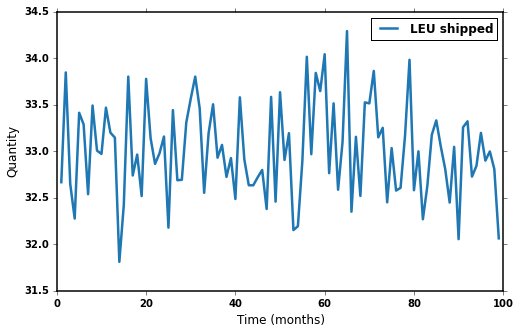

In [68]:
plt.plot(leu_time,leu_tp, label='LEU shipped', color=tableau20[i_leu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab_tp)

if ps == 1:
    savefig(plot_dir + pfix + 'leu_shipped_E5.png')


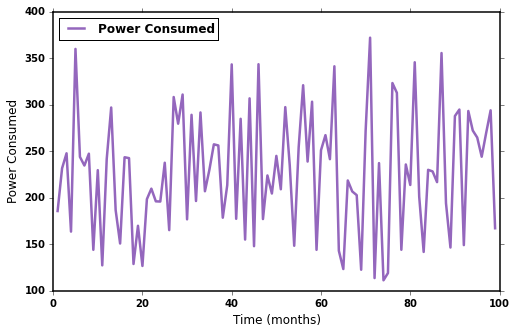

In [69]:
plt.plot(swu_time[1:],swu[1:], label='Power Consumed', color=tableau20[i_swu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab_swu)

if ps == 1:
    savefig(plot_dir + pfix + 'EF_power_E5.png')


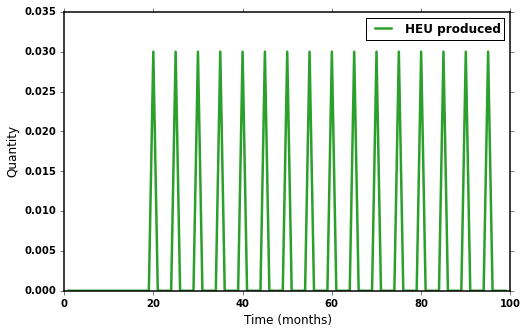

In [70]:
plt.plot(heu_time,heu_tp, label='HEU produced', color=tableau20[i_heu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab_tp)

if ps == 1:
    savefig(plot_dir + pfix + 'heu_diverted_E5.png')


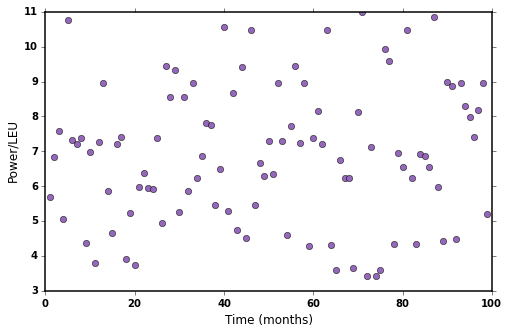

In [71]:
plt.plot(swu_time[1:],swu[1:]/leu_tp[1:], color=tableau20[i_swu], marker='o', linestyle='')

plt.xlabel(xlab)
plt.ylabel('Power/LEU')

#plt.ylim([6,7])
if ps == 1:
    savefig(plot_dir + pfix + 'ratio_swu_leu.png')
